**Name: Injuu Jyenis​**

**Dataset: Sports and Outdoors**

In [ ]:
import pandas as pd
import numpy as np
from string import punctuation, digits
import re
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
### Preprocess and clean data

# Loading the dataset
data = pd.read_csv('/content/group4_category_subset.csv')

# Handling Missing Values
# Drop rows where 'reviewText' is missing (28 instances)
data.dropna(subset=['reviewText'], inplace=True)

# For 'tot votes', 'help votes', and 'prop help', filling missing values with 0 (assuming no votes means not displayed)
data[['tot votes', 'help votes', 'prop help']] = data[['tot votes', 'help votes', 'prop help']].fillna(0)

# Removing Duplicates
data.drop_duplicates(inplace=True)

# Text Preprocessing for "reviewText"
ps = PorterStemmer()

def preprocess_text(text):
  text = text.lower() #make everything lowercase
  text = text.translate(str.maketrans('', '', digits)) #remove numbers
  text = text.translate(str.maketrans('', '', punctuation)) #remove punctuation
  text = re.sub(' +', ' ',text).strip() #remove extra spaces, and spaces at the beginning and end of the string
  t_list = text.split(" ")
  text = " ".join(ps.stem(word) for word in t_list)
  return text

data['reviewText'] = data['reviewText'].apply(preprocess_text)

# Keeping 3 columns of interest
columns_to_keep = ['reviewText', 'tot votes', 'help votes', 'prop help']
data = data[columns_to_keep]

# Saving the cleaned dataset
data.to_csv('data_cleaned.csv', index=False)

In [ ]:
# Loading the cleaned dataset
data = pd.read_csv('/content/data_cleaned.csv')

# Adding useful column
data.insert(4, "Useful", [''] * len(data), True)

cutoff = .8
numOfUsefulReviews = 0
# backfil rationale - I instituted a stringent cutoff at .8 to focus on reviews truly useful

# Iterate through reviews and give them a useful value based on proportion of helpful votes
for i in range(len(data)):
  if data['prop help'][i] >= cutoff:
    data['Useful'][i] = 'Useful'
    numOfUsefulReviews += 1
  else:
    data['Useful'][i] = 'Not Useful'

print(data)
print('Number of Useful Reviews: ', numOfUsefulReviews)



Streaming output truncated to the last 5000 lines.
<ipython-input-3-5582b26c02d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Useful'][i] = 'Useful'
<ipython-input-3-5582b26c02d5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Useful'][i] = 'Not Useful'
<ipython-input-3-5582b26c02d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Useful'][i] = 'Useful'
<ipython-input-3-5582b26c02d5>:14: SettingWithCopyWarn

                                             reviewText  tot votes  \
0     i had a factori glock tool that i wa use for m...          1   
1     if you dont have a punch or would like to have...          2   
2     light and laser torch work well veri bright ju...          1   
3     i bought the purpl one to add to my strong man...          1   
4     well i have had thi band for about a month and...          2   
...                                                 ...        ...   
3478  im veri happi with the fit and finish of thi p...          1   
3479  not as bright as i thought they would be but e...          1   
3480  i instal the sight in under ten minut with no ...          7   
3481  these sight appear to be high qualiti and are ...          4   
3482  doesnt seem to have a bright light at night ti...          1   

      help votes  prop help      Useful  
0              1   1.000000      Useful  
1              2   1.000000      Useful  
2              0   0.000000  Not 

<ipython-input-3-5582b26c02d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Useful'][i] = 'Useful'
<ipython-input-3-5582b26c02d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Useful'][i] = 'Useful'
<ipython-input-3-5582b26c02d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Useful'][i] = 'Useful'
<ipython-input-3-5582b26c02d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [ ]:
### Create a DTM with appropriate preprocessing steps

docs = data["reviewText"]
labels = data["Useful"]


# Enhancing stop words by stemming them

mystopwords = list(ENGLISH_STOP_WORDS)
mystopwords = [word for word in mystopwords]
mystopwords.sort()
stem_mystopwords = [ps.stem(word) for word in mystopwords]

# Preprocessing the documents and creating the Document-Term Matrix (DTM)
cv = CountVectorizer(preprocessor=preprocess_text,
                     stop_words=stem_mystopwords,
                     ngram_range=(1, 1))

# Fitting the CountVectorizer to the docs to create the DTM
dtm1 = cv.fit_transform(docs)

# Extracting terms and their frequencies from the DTM

terms = cv.get_feature_names_out()
freq_sum = dtm1.sum(axis=0)[0].tolist()[0] #this creates a list within a list so I select the first element



/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['anywh', 'becau', 'el', 'elsewh', 'everywh', 'ind', 'otherwi', 'plea', 'somewh'] not in stop_words.
  warnings.warn(


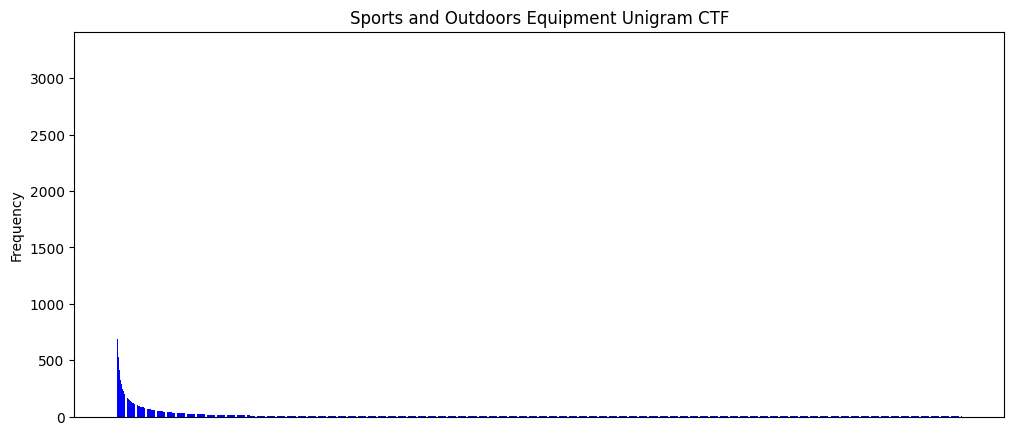

(3483, 136)


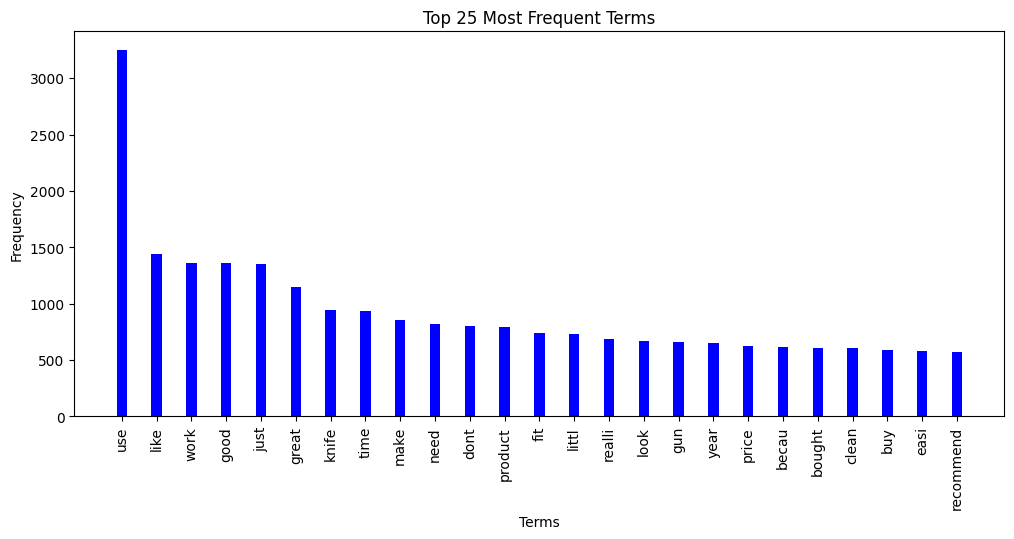

In [ ]:
# Histogram of Sports and Outdoors Equipment Unigram CTF

cv1 = CountVectorizer(preprocessor=preprocess_text,
                     stop_words=stem_mystopwords,
                     ngram_range=(1, 1))

terms1 = cv.get_feature_names_out()
freq_sum1 = dtm1.sum(axis=0)[0].tolist()[0]

ctf_unigrams1 = pd.DataFrame({"terms": terms1,
                             "freq": freq_sum1})

ctf_unigrams1.sort_values("freq",ascending=False,inplace=True)
ctf_terms1 = ctf_unigrams1["terms"].tolist()
ctf_vals1 = ctf_unigrams1["freq"].tolist()

fig = plt.figure(figsize = (12, 5))
plt.bar(ctf_terms1, ctf_vals1, color ='blue')
#remove x axis labels
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
#remove x-axis ticks
plt.tick_params(bottom = False)
plt.ylabel("Frequency")
plt.title("Sports and Outdoors Equipment Unigram CTF")
plt.show()

# Filtering terms with frequency greater than 200 to create a new vocabulary
#ctf_unigrams1 = pd.DataFrame({"terms": terms,
#                             "freq": freq_sum})

unigrams1 = ctf_unigrams1[ctf_unigrams1["freq"] > 200]["terms"].tolist()



# Recreating the CountVectorizer with the filtered vocabulary
cv_filtered = CountVectorizer(preprocessor=preprocess_text,
                              stop_words=stem_mystopwords,
                              ngram_range=(1, 1),
                              vocabulary=unigrams1)

# Applying the filtered CountVectorizer to the docs
dtm1_filtered = cv_filtered.fit_transform(docs)

# Outputting the shape of the filtered DTM1
print(dtm1_filtered.shape)

# Histogram of the top 25 most frequent terms - Unigram
ctf_unigrams1.sort_values("freq",ascending=False,inplace=True)
ctf_terms = ctf_unigrams1.iloc[:25]["terms"].tolist()
ctf_vals = ctf_unigrams1.iloc[:25]["freq"].tolist()

fig = plt.figure(figsize = (12, 5))
plt.bar(ctf_terms, ctf_vals, color ='blue',
        width = 0.3)
plt.xticks(rotation = 90)
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.title("Top 25 Most Frequent Terms")
plt.show()

Wordcloud of all reviews


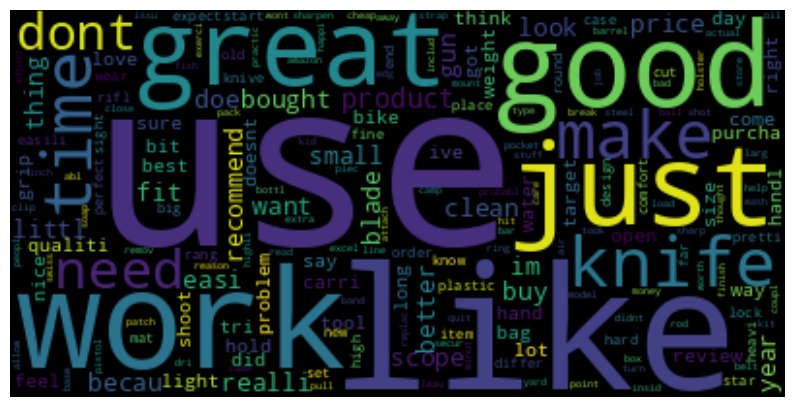

Wordcloud of useful reviews


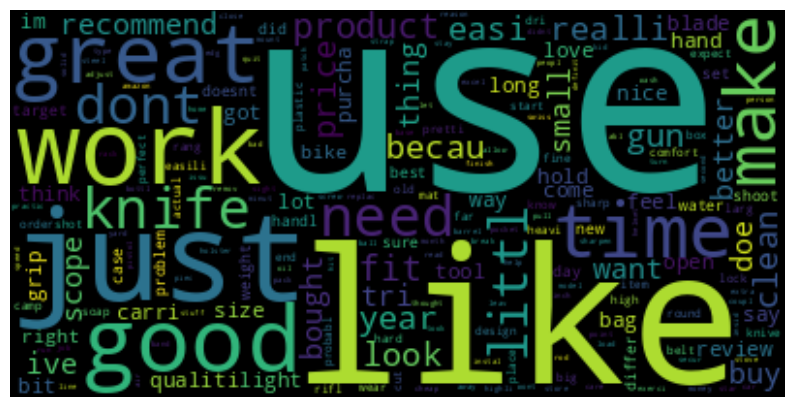

Wordcloud of not useful reviews


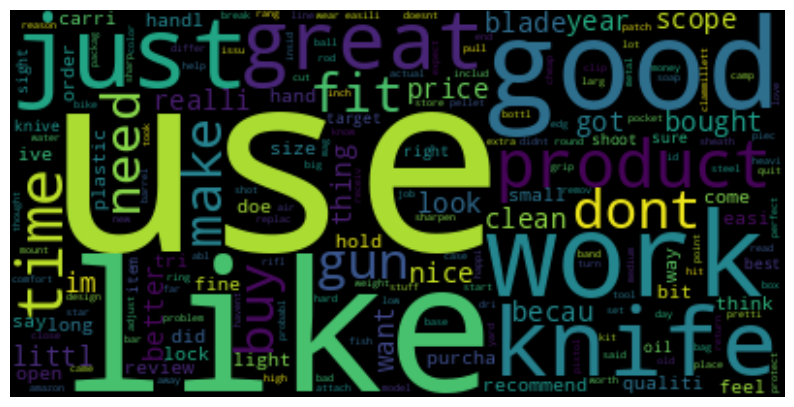

In [ ]:
# Word Clouds

tf_dict1 = {}
for ind in ctf_unigrams1.index:
    tf_dict1[ctf_unigrams1['terms'][ind]] = ctf_unigrams1['freq'][ind]

wordcld = WordCloud()
wordcld.generate_from_frequencies(tf_dict1)
print("Wordcloud of all reviews")
plt.figure(figsize=(10, 8))
plt.imshow(wordcld,interpolation="bilinear")
plt.axis("off")
plt.show()

docs_useful = data.loc[data["Useful"] == "Useful", "reviewText"]
docs_not_useful = data.loc[data["Useful"] == "Not Useful", "reviewText"]
dtm2 = cv1.fit_transform(docs_useful)
terms_useful = cv1.get_feature_names_out()
dtm3 = cv1.fit_transform(docs_not_useful)
terms_not_useful = cv1.get_feature_names_out()
freq_sum_useful = dtm2.sum(axis=0)[0].tolist()[0] #this creates a list within a list so I select the first element
freq_sum_not_useful = dtm3.sum(axis=0)[0].tolist()[0] #this creates a list within a list so I select the first element
ctf_unigrams_useful = pd.DataFrame({"terms": terms_useful,
                             "freq": freq_sum_useful})
ctf_unigrams_not_useful = pd.DataFrame({"terms": terms_not_useful,
                             "freq": freq_sum_not_useful})
tf_dict2 = {}
for ind in ctf_unigrams_useful.index:
    tf_dict2[ctf_unigrams_useful['terms'][ind]] = ctf_unigrams_useful['freq'][ind]
tf_dict3 = {}
for ind in ctf_unigrams_not_useful.index:
    tf_dict3[ctf_unigrams_not_useful['terms'][ind]] = ctf_unigrams_not_useful['freq'][ind]
print("Wordcloud of useful reviews")
wordcld.generate_from_frequencies(tf_dict2)
plt.figure(figsize=(10, 8))
plt.imshow(wordcld,interpolation="bilinear")
plt.axis("off")
plt.show()
print("Wordcloud of not useful reviews")
wordcld.generate_from_frequencies(tf_dict3)
plt.figure(figsize=(10, 8))
plt.imshow(wordcld,interpolation="bilinear")
plt.axis("off")
plt.show()

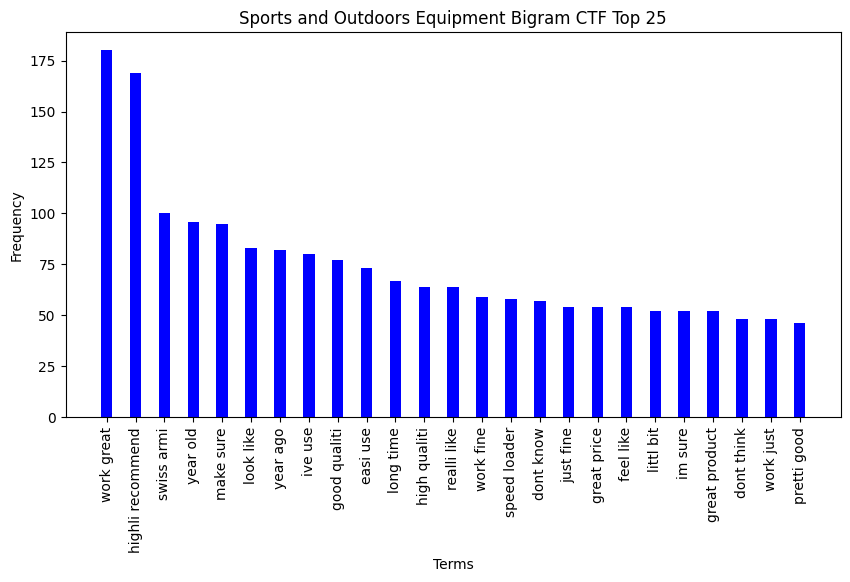

In [ ]:
# Bigrams

cv2 = CountVectorizer(preprocessor=preprocess_text,
                     stop_words=stem_mystopwords,
                     ngram_range= (2,2))
dtm_bi = cv2.fit_transform(docs)

terms2 = cv2.get_feature_names_out()
freq_sum2 = dtm_bi.sum(axis=0)[0].tolist()[0] #this creates a list within a list so I select the first element
ctf_bi = pd.DataFrame({"terms":terms2,
                    "freq":freq_sum2})
ctf_bi.sort_values("freq",ascending=False,inplace=True)
ctf_terms2 = ctf_bi.iloc[:25]["terms"].tolist()
ctf_vals2 = ctf_bi.iloc[:25]["freq"].tolist()

fig = plt.figure(figsize = (10, 5))
plt.bar(ctf_terms2, ctf_vals2, color ='blue',
        width = 0.4)
plt.xticks(rotation = 90)
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.title("Sports and Outdoors Equipment Bigram CTF Top 25")
plt.show()


In [ ]:
### Train-test Split

from sklearn.model_selection import train_test_split

# Define labels

#labels = data["Useful"]

# convert discrete labels to binary 0-1 labels
num_labels = labels.replace(["Not Useful","Useful"],[0,1])

# Convert sparse matrix to DataFrame
dtm1_df = pd.DataFrame(dtm1.toarray(),columns=cv.get_feature_names_out())

# Train-test split using indices
train_ind_example = np.random.choice(dtm1_df.shape[0],round(dtm1_df.shape[0]*0.8),replace=False)
test_ind_example = list(set([i for i in range(dtm1_df.shape[0])]) - set(train_ind_example))
X_train = dtm1_df.iloc[train_ind_example]
X_test = dtm1_df.iloc[test_ind_example]
y_train = np.array(num_labels)[train_ind_example]
y_test = np.array(num_labels)[test_ind_example]

# check if there's a mismatch in the number of samples.
print("Shape of dtm1_df:", dtm1_df.shape)
print("Shape of num_labels:", num_labels.shape)
# The shapes of our feature matrix dtm1_df and labels num_labels indicate a significant inconsistency.
# The feature matrix has only 5 samples, while the labels have 18951 samples.

# Check the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Check number of samples in dtm1_df and num_labels
print("Number of samples in dtm1_df:", dtm1_df.shape[0])
print("Number of samples in num_labels:", num_labels.shape[0])

# Align the dtm_df
dtm1_df = dtm1_df[:num_labels.shape[0]]

# Align num_labels with dtm1_df
num_labels_aligned = num_labels[:dtm1_df.shape[0]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(dtm1_df, num_labels_aligned,
                                                    test_size=0.2,
                                                    random_state=42)

Shape of dtm1_df: (3483, 14457)
Shape of num_labels: (3483,)
Shape of X_train: (2786, 14457)
Shape of X_test: (697, 14457)
Shape of y_train: (2786,)
Shape of y_test: (697,)
Number of samples in dtm1_df: 3483
Number of samples in num_labels: 3483


Accuracy: 0.6527977044476327


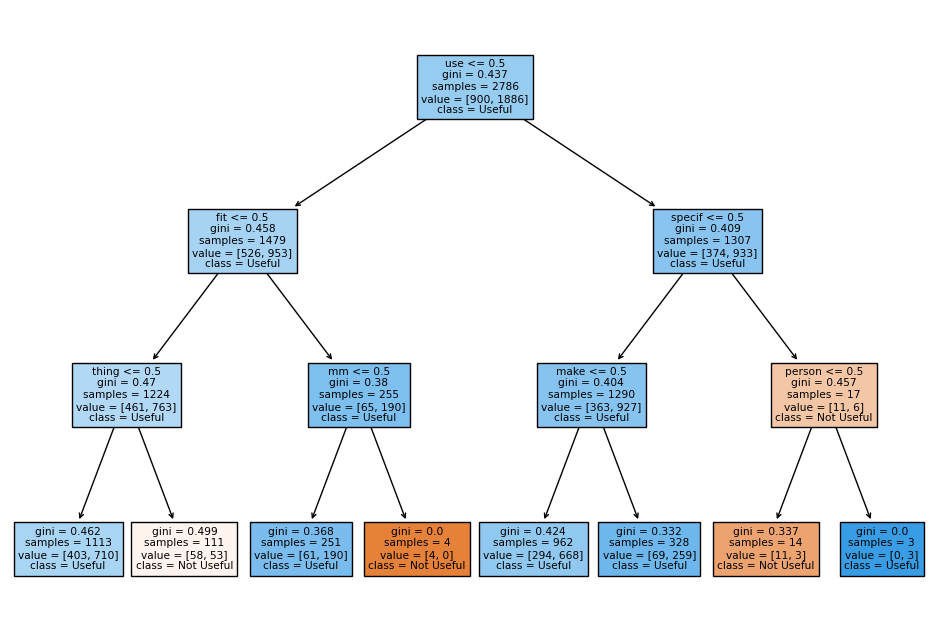

In [ ]:
### Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(max_depth = 3, min_samples_split = 5, min_samples_leaf = 2)  ######### play around here with parameters

# different parameter combinations or just interpretable? Better if optimized

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict using the trained classifier on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=dtm1_df.columns, class_names=["Not Useful", "Useful"])
plt.show()

Accuracy: 0.6527977044476327


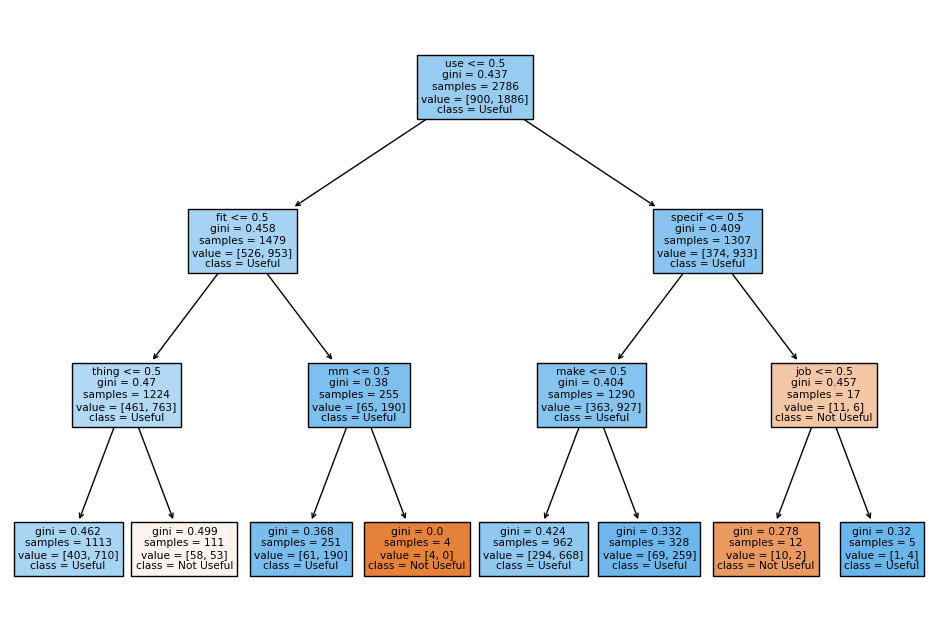

In [ ]:
# Trying to optimize decision tree results

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()


# Perform grid search (exhaustive and takes longer than a randomized search)
#grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
#grid_search.fit(X_train, y_train)

# Perform randomized search (Randomized search tends to be faster because it evaluates only a fixed number of random combinations of parameters)
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters and the best estimator (Grid)
#best_params = grid_search.best_params_
#best_clf = grid_search.best_estimator_

# Get the best parameters and the best estimator (Random)
best_params = random_search.best_params_
best_clf = random_search.best_estimator_

# Train the classifier on the training data using the best parameters
best_clf.fit(X_train, y_train)

# Predict using the trained classifier on the test data
y_pred = best_clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(best_clf, filled=True, feature_names=dtm1_df.columns, class_names=["Not Useful", "Useful"])
plt.show()



Class Distribution:
Useful
Useful        2361
Not Useful    1122
Name: count, dtype: int64

Train-Test Split:
Number of samples in training set: 2786
Number of samples in test set: 697

Number of common indices between train and test sets: 0

Accuracy on training set: 0.6830581478822685

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.03      0.05       222
           1       0.68      0.94      0.79       475

    accuracy                           0.65       697
   macro avg       0.44      0.49      0.42       697
weighted avg       0.53      0.65      0.55       697



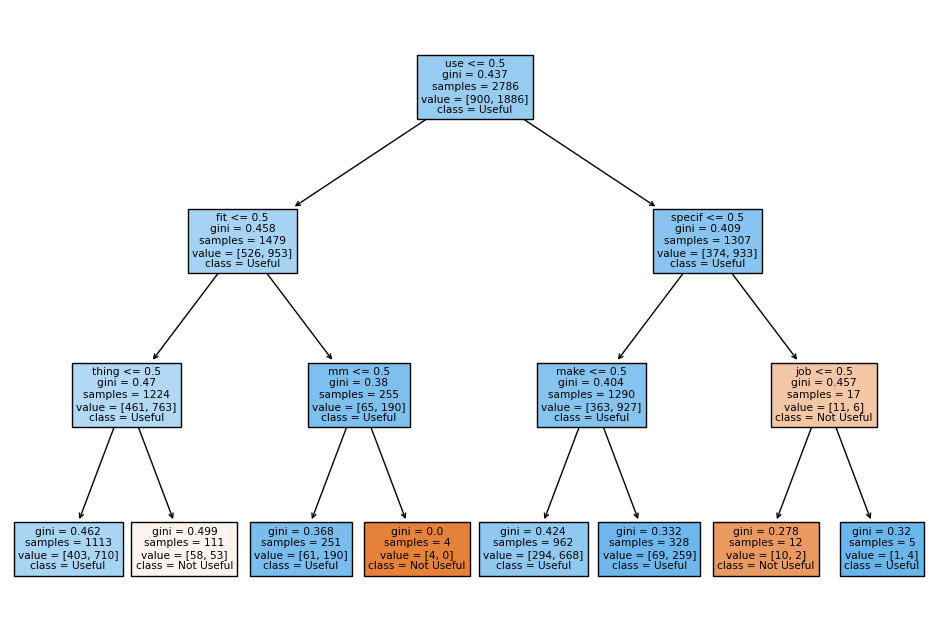

In [ ]:
### Gathering more inferences about the decision tree

import pickle as pkl
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# After performing the grid search and obtaining the best classifier
#best_clf = grid_search.best_estimator_

# After performing the random search and obtaining the best classifier
best_clf = random_search.best_estimator_

# Save the best classifier to a pickle file
with open('best_classifier.pkl', 'wb') as f:
    pkl.dump(best_clf, f)

# Check class distribution
class_distribution = data['Useful'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Check train-test split
print("\nTrain-Test Split:")
print("Number of samples in training set:", len(X_train))
print("Number of samples in test set:", len(X_test))

# Check for data leakage
# Ensure no test data is included in training data
test_indices_set = set(test_ind_example)
train_indices_set = set(train_ind_example)
intersection = test_indices_set.intersection(train_indices_set)
print("\nNumber of common indices between train and test sets:", len(intersection))

indices = {
    'train_indices': train_indices_set,
    'test_indices': test_indices_set
}

# Save the indices to a .pkl file
with open('indices.pkl', 'wb') as f:
    pkl.dump(indices, f)

# Check for overfitting
# Evaluate accuracy on training set
y_train_pred = best_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("\nAccuracy on training set:", train_accuracy)

# Evaluate other metrics (precision, recall, f1-score)
y_pred = best_clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the decision boundaries on training set
plt.figure(figsize=(12, 8))
plot_tree(best_clf, filled=True, feature_names=dtm1_df.columns, class_names=["Not Useful", "Useful"])
plt.show()

# how did I decide on parameters for decision tree? Used optimization on previous block of code.


In [ ]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=75)
kNN.fit(X_train, y_train)
test_pred = kNN.predict(X_test)
print(test_pred)

[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
# KNN Evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred, average='weighted')
recall = recall_score(y_test, test_pred, average='weighted')
f1 = f1_score(y_test, test_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, test_pred)
print("KNN = 75")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

KNN = 75
Accuracy: 0.6599713055954088
Precision: 0.5945158206611633
Recall: 0.6599713055954088
F1-score: 0.594165451398874
Confusion Matrix:
 [[ 27 195]
 [ 42 433]]


In [ ]:
# KNN Cross Validation

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(kNN, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean cross-validation score:", mean_cv_score)

Cross-validation scores: [0.67383513 0.68043088 0.64991023 0.66427289 0.6427289 ]
Mean cross-validation score: 0.6622356067772179


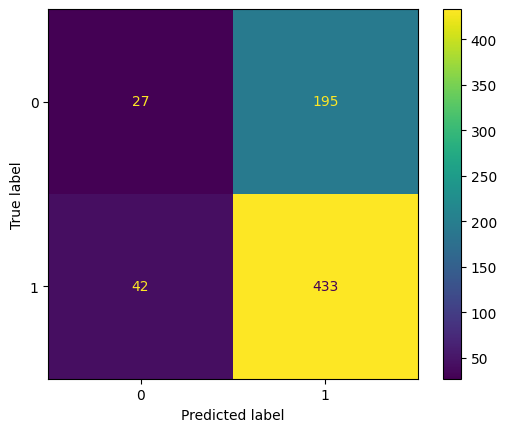

In [ ]:
# KNN Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
knn_contable = confusion_matrix(y_test,test_pred,labels=[0,1])
knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_contable,
                             display_labels=[0,1])
knn_disp.plot()

AUC score: 0.5740018966334757


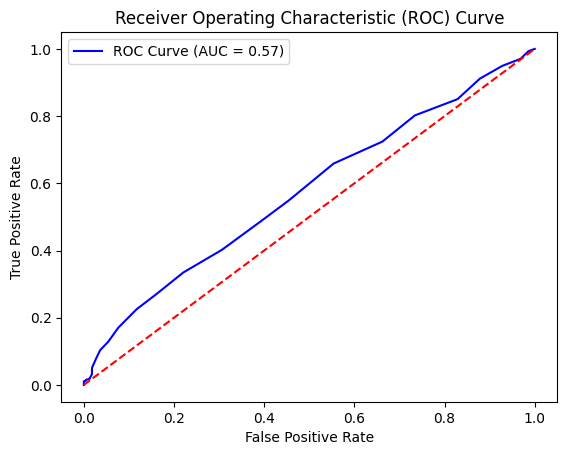

In [ ]:
# KNN AUC Score and ROC Curve

from sklearn.metrics import roc_auc_score, roc_curve

y_prob = kNN.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("AUC score:", auc_score)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm

# Training the logistic regression model
log_reg = LogisticRegression(random_state=42).fit(X_train, y_train)

# Making predictions
log_pred = log_reg.predict(X_test)

# Printing predictions
print(log_pred)

# Summary of the logistic regression model
#logit_model = sm.Logit(y_train, sm.add_constant(X_train)).fit()

#result = logit_model.fit()
#print(logit_model.summary())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0
 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1
 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 0 0 1 1 0 1 1 1 1 1 1 1 

Logistic Regression Prediction
Accuracy: 0.6341463414634146
Precision: 0.6162440758417607
Recall: 0.6341463414634146
F1-score: 0.6231040326443408
Confusion Matrix:
 [[ 74 148]
 [107 368]]


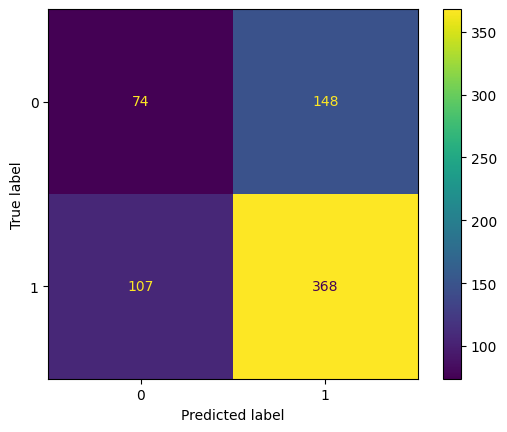

In [ ]:
### Logistic Regression Confusion Matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

lr_contable = confusion_matrix(y_test,log_pred,labels=[0,1])
lr_disp = ConfusionMatrixDisplay(confusion_matrix=lr_contable,
                             display_labels=[0,1])
lr_disp.plot()

accuracy = accuracy_score(y_test, log_pred)
precision = precision_score(y_test, log_pred, average='weighted')
recall = recall_score(y_test, log_pred, average='weighted')
f1 = f1_score(y_test, log_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, log_pred)
print("Logistic Regression Prediction")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

In [ ]:
#CNN

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

tokenizer = keras.preprocessing.text.Tokenizer(num_words=1000)
tokenizer.fit_on_texts(data['reviewText'])
sequences = tokenizer.texts_to_sequences(data['reviewText'])
max_length = max(len(x) for x in sequences)  # Find the max sequence length
x = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length)

# Convert labels to numerical format
y = data['Useful'].replace({"Not Useful": 0, "Useful": 1}).values

# Split data into training and test sets
x_train, x_test, train_label, test_label = train_test_split(x, y, test_size=0.2, random_state=42)

model = keras.Sequential()

#Building the model by sequentially adding each layer
model.add(
    layers.Embedding(input_dim=1000, output_dim=25, input_length=max_length)
    )

model.add(
    layers.Conv1D(25, 5, activation='relu')
    )

model.add(
    layers.GlobalMaxPooling1D()
    )

model.add(
    layers.Dense(1, activation='sigmoid')
    )
#Compiling and training
model.compile(
    loss='BinaryCrossentropy',
    optimizer='adam',
    metrics=["accuracy","AUC"]
)

Epoch 1/20
38/38 [==============================] - 32s 466ms/step - loss: 0.6479 - accuracy: 0.6800 - auc: 0.5131 - val_loss: 0.6363 - val_accuracy: 0.6649 - val_auc: 0.5411
Epoch 2/20
38/38 [==============================] - 5s 126ms/step - loss: 0.6174 - accuracy: 0.6800 - auc: 0.6226 - val_loss: 0.6355 - val_accuracy: 0.6649 - val_auc: 0.5386
Epoch 3/20
38/38 [==============================] - 3s 83ms/step - loss: 0.6083 - accuracy: 0.6800 - auc: 0.7430 - val_loss: 0.6351 - val_accuracy: 0.6649 - val_auc: 0.5485
Epoch 4/20
38/38 [==============================] - 3s 73ms/step - loss: 0.5999 - accuracy: 0.6800 - auc: 0.8032 - val_loss: 0.6363 - val_accuracy: 0.6649 - val_auc: 0.5400
Epoch 5/20
38/38 [==============================] - 2s 49ms/step - loss: 0.5902 - accuracy: 0.6800 - auc: 0.8471 - val_loss: 0.6357 - val_accuracy: 0.6649 - val_auc: 0.5416
Epoch 6/20
38/38 [==============================] - 2s 53ms/step - loss: 0.5784 - accuracy: 0.6809 - auc: 0.8637 - val_loss: 0.6356 

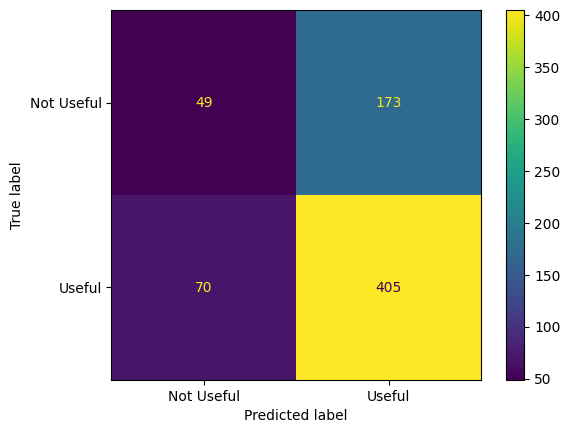

In [ ]:


history = model.fit(
    x_train,
    train_label,
    epochs=20,
    batch_size=60,
    validation_split=0.20
)


# Evaluate the model on the test data
evaluation_results = model.evaluate(x_test, test_label)
print(f'Test Loss: {evaluation_results[0]}, Test Accuracy: {evaluation_results[1]}, Test AUC: {evaluation_results[2]}')

# Predictions
test_pred_prob = model.predict(x_test)
test_pred_label = (test_pred_prob > 0.5).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(test_label, test_pred_label, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Useful', 'Useful'])
disp.plot()


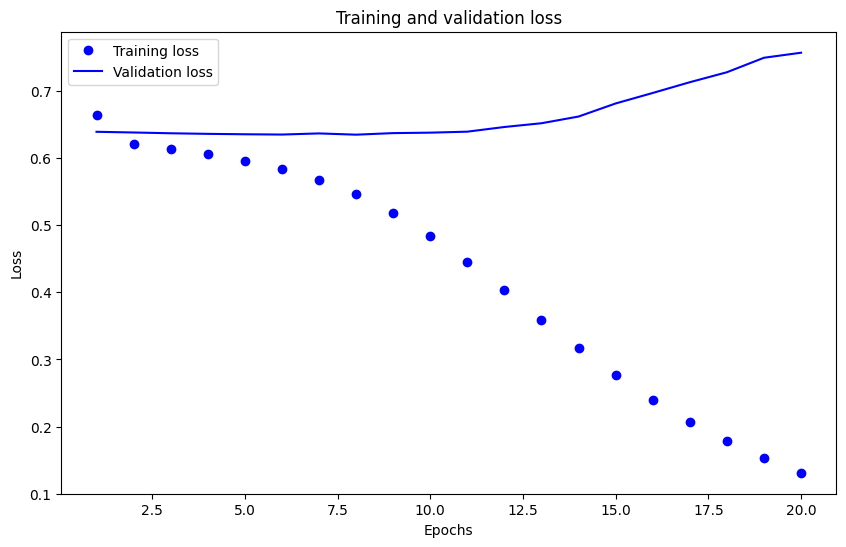

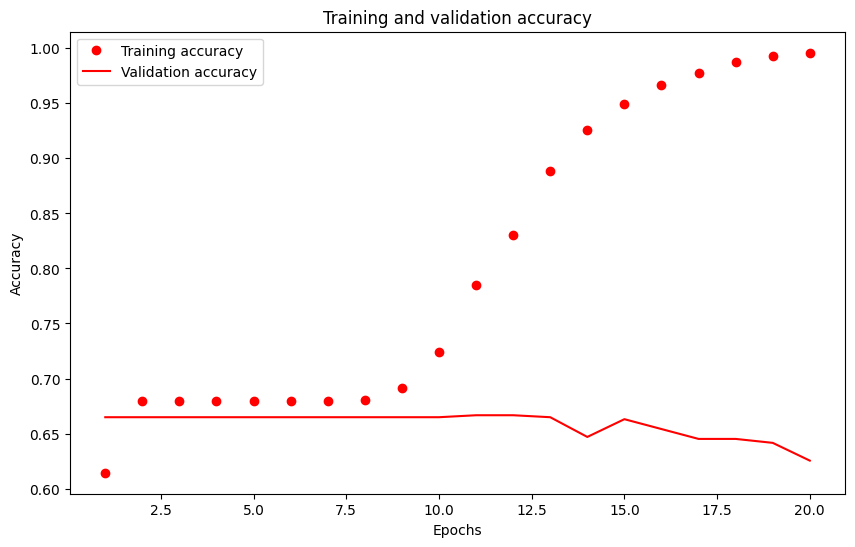

In [ ]:
# prompt: visualize the model loss and accuracy

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(10, 6))

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.figure(figsize=(10, 6))

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
